<a href="https://colab.research.google.com/github/suesinha/CODSOFT/blob/main/Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score

In [70]:
data = pd.read_csv('/content/drive/MyDrive/tested.csv', delimiter=',')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [72]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,1281,0,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
352,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
204,1096,0,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,C.A. 34050,10.5000,NaN,S
113,1005,1,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
85,977,0,3,"Khalil, Mr. Betros",male,NaN,1,0,2660,14.4542,NaN,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
221,1113,0,3,"Reynolds, Mr. Harold J",male,21.0,0,0,342684,8.0500,NaN,S
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C
243,1135,0,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
320,1212,0,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,NaN,S


In [73]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [74]:
Embarked = data['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [75]:
data['Age'] = data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(int)

In [76]:
data.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [77]:
data['Embarked'] = data['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
data['Sex'] = data['Sex'].map( {'female': 1,'male':0}).astype(int)

In [78]:
features = data.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
 1   Pclass    418 non-null    int64
 2   Sex       418 non-null    int64
 3   Age       418 non-null    int64
 4   SibSp     418 non-null    int64
 5   Parch     418 non-null    int64
 6   Fare      418 non-null    int64
 7   Embarked  418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


# Visualization of Data


(array([ 16.,  16.,  71., 183.,  40.,  40.,  25.,  17.,   9.,   1.]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <BarContainer object of 10 artists>)

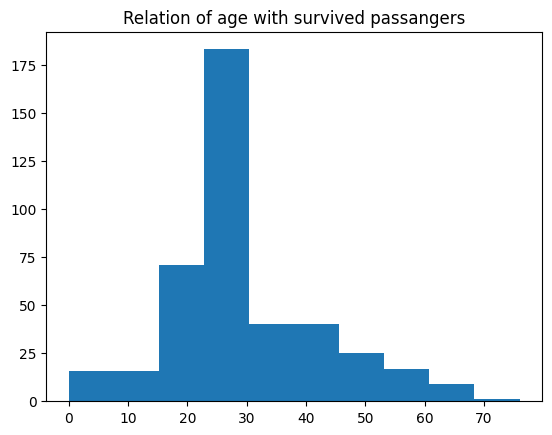

In [80]:
plt.title("Relation of age with survived passangers")
plt.hist(data.Age)

<Axes: xlabel='Sex', ylabel='count'>

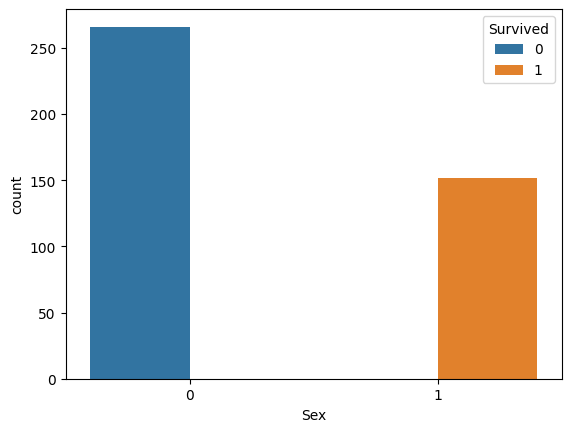

In [81]:
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Embarked', ylabel='count'>

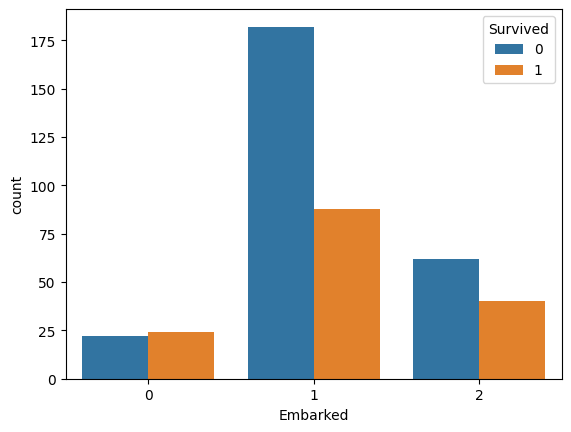

In [82]:
sns.countplot(x='Embarked',hue='Survived',data=data)

In [102]:
Train = data.drop(['Survived'], axis=1)
Test = data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.25, random_state = 1)

In [104]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 93.33%
